In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Tdata= pd.read_csv("train.csv")

In [4]:
Tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(array([40., 14., 15., 44., 91., 97., 83., 79., 74., 48., 31., 34., 22.,
        16., 13.,  6.,  5.,  1.,  1.]),
 array([ 0.42      ,  4.60842105,  8.79684211, 12.98526316, 17.17368421,
        21.36210526, 25.55052632, 29.73894737, 33.92736842, 38.11578947,
        42.30421053, 46.49263158, 50.68105263, 54.86947368, 59.05789474,
        63.24631579, 67.43473684, 71.62315789, 75.81157895, 80.        ]),
 <BarContainer object of 19 artists>)

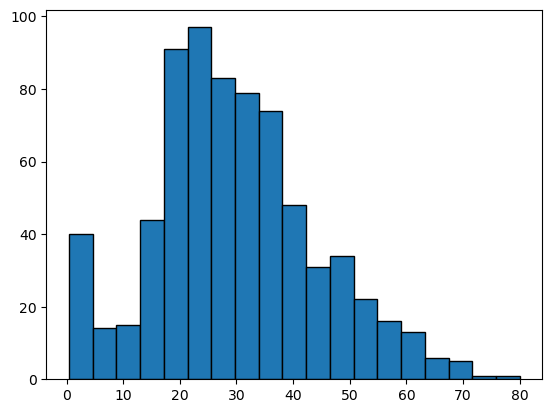

In [5]:
age_data=Tdata['Age']
age_data.dropna(inplace=True)

iqr = np.percentile(age_data, 75)-np.percentile(age_data, 25)
bin_width=2*iqr/(len(age_data)**(1/3))
np.percentile(age_data, 75)
num_bins=int((max(age_data)-min(age_data))/bin_width)
plt.hist(age_data, bins=num_bins, edgecolor='black')

In [6]:
Tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


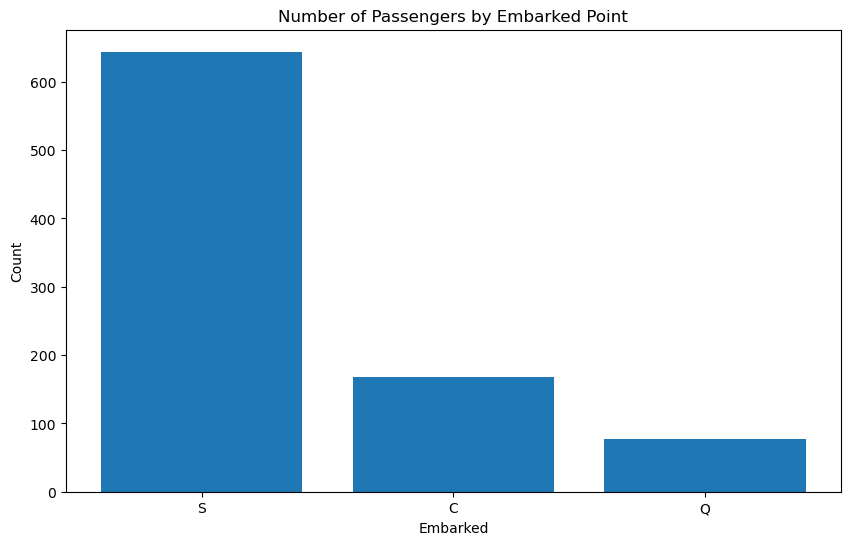

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [7]:
# Assuming Tdata is your DataFrame
embarked_count = Tdata['Embarked'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(embarked_count.index, embarked_count.values)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Number of Passengers by Embarked Point')
plt.show()

# Printing the value counts
print(embarked_count)

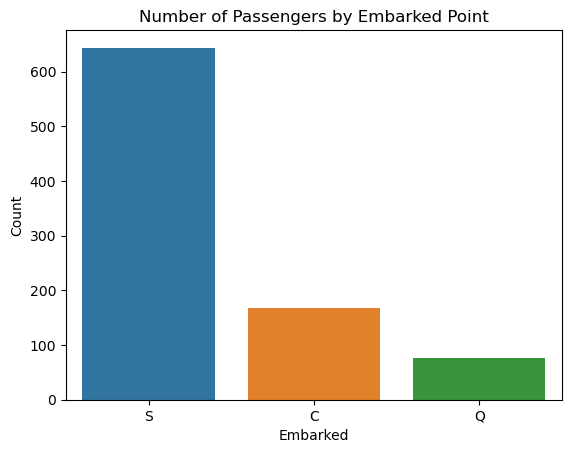

In [8]:
sns.countplot(x='Embarked', data=Tdata)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Number of Passengers by Embarked Point')
plt.show()

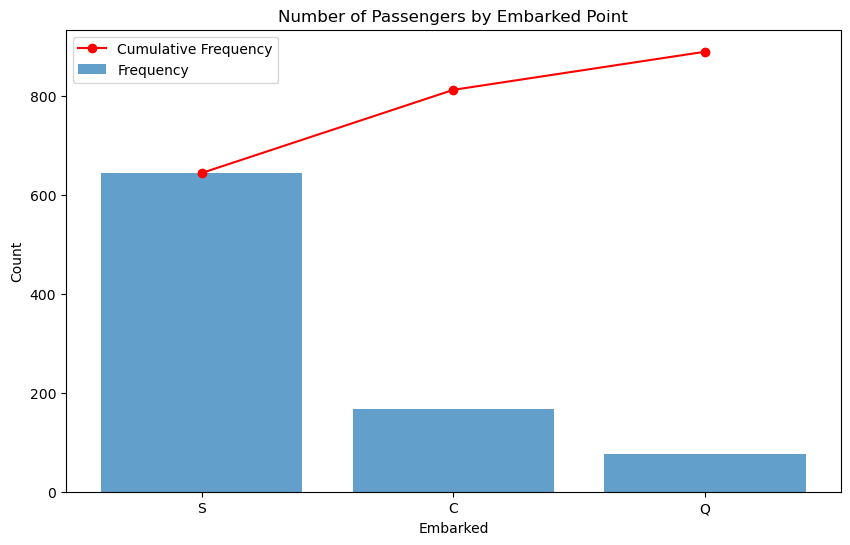

In [9]:
embarked_count = Tdata['Embarked'].value_counts()

# Calculate cumulative frequency
cumulative_frequency = embarked_count.cumsum()

# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(embarked_count.index, embarked_count.values, alpha=0.7, label='Frequency')

# Plotting the cumulative frequency
plt.plot(cumulative_frequency.index, cumulative_frequency.values, marker='o', color='red', label='Cumulative Frequency')

# Adding labels and title
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Number of Passengers by Embarked Point')
plt.legend()

plt.show()

In [10]:
Tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
contingency_table= pd.crosstab(Tdata['Sex'],Tdata['Pclass'])
#contingency_table= pd.crosstab(Tdata['Pclass'],Tdata['Sex'])
contingency_table

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


[0. 1.]
[0.2 1.2]
[0.4 1.4]


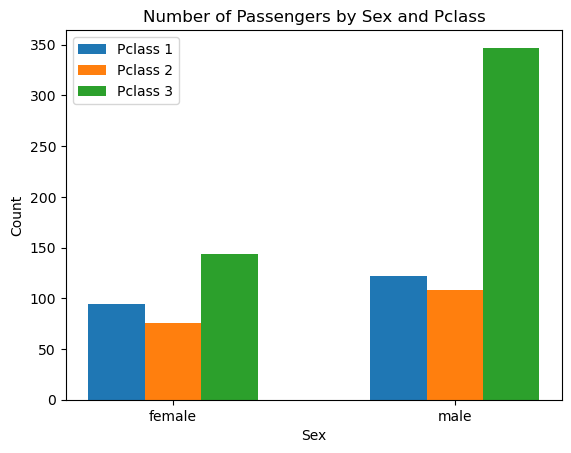

In [12]:
bar_width = 0.2
"""np.arange(len(contingency_table)):

np.arange is a function from the NumPy library that creates an array of evenly spaced values within a given range.
len(contingency_table) returns the number of rows in the contingency table, which corresponds to the number of unique categories in the Sex column (i.e., male and female).
This line creates an array of indices for the x-axis positions of the bars. For example, if there are 2 rows (male and female), index will be array([0, 1])"""
index = np.arange(len(contingency_table))

# Plot each Pclass category
"""This line initiates a loop to iterate over each column (Pclass category) in the contingency table.
enumerate(contingency_table.columns):
enumerate provides a counter (starting from 0) along with the values. So, i is the counter (0, 1, 2, ...) and pclass is the current column name (Pclass 1, Pclass 2, Pclass 3)."""
for i, pclass in enumerate(contingency_table.columns):
    print(index+i*bar_width)
    """
    x: The x-coordinates of the bars.

index + i * bar_width:
index: An array of base positions for the bars (e.g., array([0, 1]) for male and female categories).
i * bar_width: An offset to position the bars for different Pclass categories next to each other. For example, i = 0 means no offset, i = 1 means an offset of one bar width, etc.
Together, index + i * bar_width provides the x-coordinates for the bars, ensuring that bars for different Pclass categories are grouped together for each Sex category.
height: The heights of the bars.

contingency_table[pclass]:
This selects the data for the current Pclass category from the contingency table.
It provides the heights of the bars, i.e., the counts of each Pclass within each Sex category.

    """
    plt.bar(index + i * bar_width, contingency_table[pclass], bar_width, label=f'Pclass {pclass}')

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Passengers by Sex and Pclass')
plt.xticks(index + bar_width, contingency_table.index)
plt.legend()


In [13]:
contingency_table[pclass]

Sex
female    144
male      347
Name: 3, dtype: int64

In [15]:
Tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Sex', ylabel='Age'>

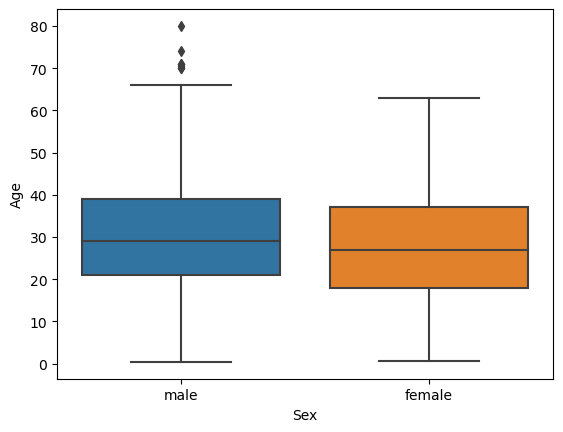

In [19]:
sns.boxplot(x='Sex', y='Age', data=Tdata)
